In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
#hi i am trying to change code on local and commit it online

In [ ]:
air = pd.read_csv('AB_NYC_2019.csv')
air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
air.shape

(48895, 16)

In [ ]:
air.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
air.duplicated().sum()
air.drop_duplicates(inplace=True) #duplicate values are droped
#there are no duplicate values

In [ ]:
air.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
air.drop(['id','name','host_name','last_review'],axis = 1,inplace=True) #unnecessary col are droped

In [ ]:
air.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
air.fillna({'reviews_per_month':0},inplace = True)  # all the null values in the column are filled with 0

In [ ]:
air.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
air.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
air.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

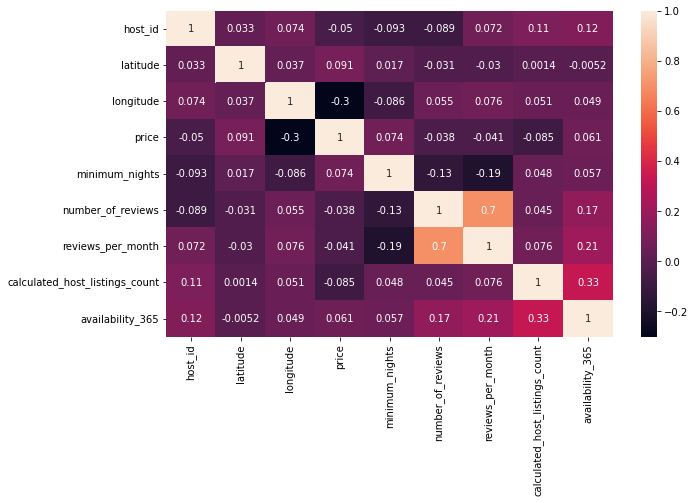

In [ ]:
#correlation between 2 variables
corr = air.corr(method = 'kendall')
plt.figure(figsize = (10,6))
sns.heatmap(corr,annot = True)

In [ ]:
air['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

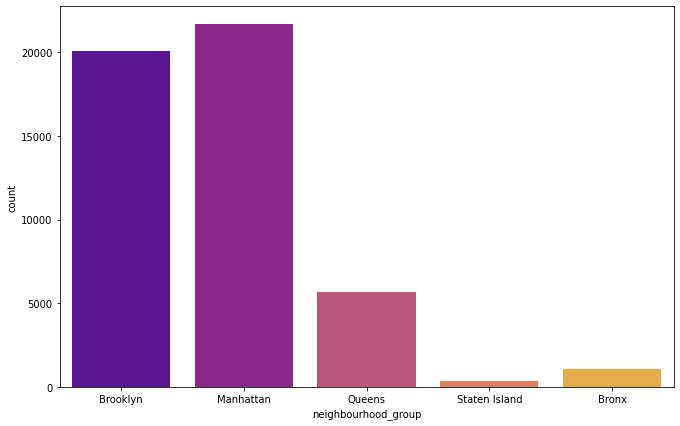

In [ ]:
sns.countplot(air['neighbourhood_group'],palette='plasma')
fig = plt.gcf()
fig.set_size_inches(11,7)

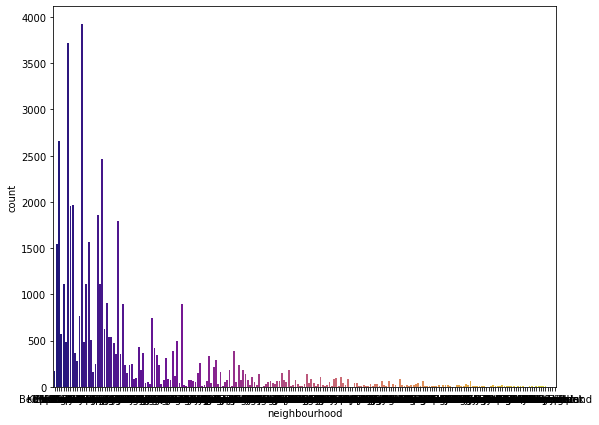

In [ ]:
sns.countplot(air['neighbourhood'],palette='plasma')
fig = plt.gcf()
fig.set_size_inches(9,7)

In [ ]:
values=[21661,20104,5666,1091,373]
keys=['Manhattan','Brooklyn','Queens','Bronx','Staten Island']

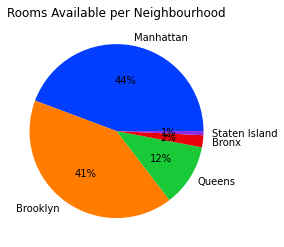

In [ ]:
palette_color = sns.color_palette('bright')
data=air['neighbourhood_group']
# plotting data on chart
plt.pie(values,labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title("Rooms Available per Neighbourhood")
# displaying chart
plt.show()


Text(0.5, 1.0, 'Restaurants delivering rooms online or not')

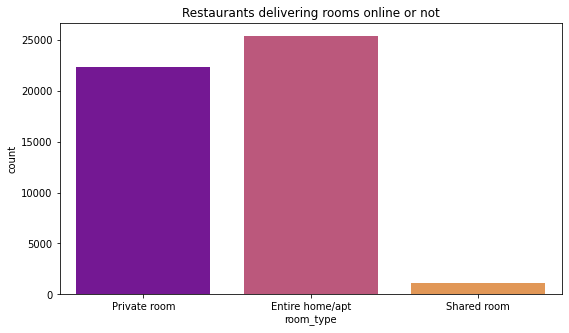

In [ ]:
#ROOM TYPE
sns.countplot(air['room_type'],palette='plasma')
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.title('Restaurants delivering rooms online or not')
# there are more of entire rooms/apt sold and shared rooms are sold the least


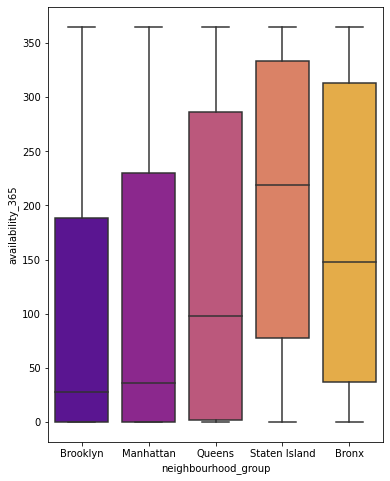

In [ ]:
#relationship between neighbourhood and availability of room
plt.figure(figsize=(6,8))
a = sns.boxplot(data=air , x = 'neighbourhood_group', y = 'availability_365',palette='plasma')


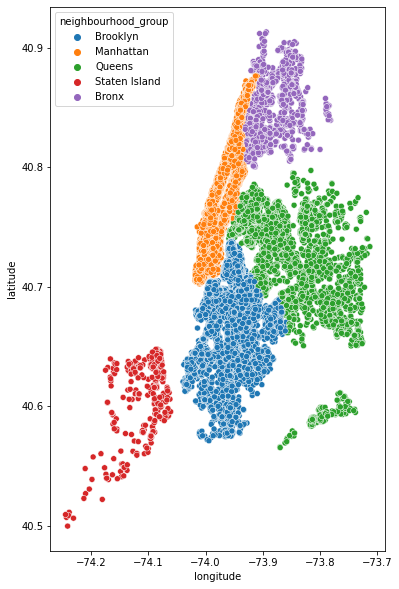

In [ ]:
# neighbourhoood group map
plt.figure(figsize=(6,10))
sns.scatterplot(air.longitude, air.latitude,hue = air.neighbourhood_group)
plt.ioff()

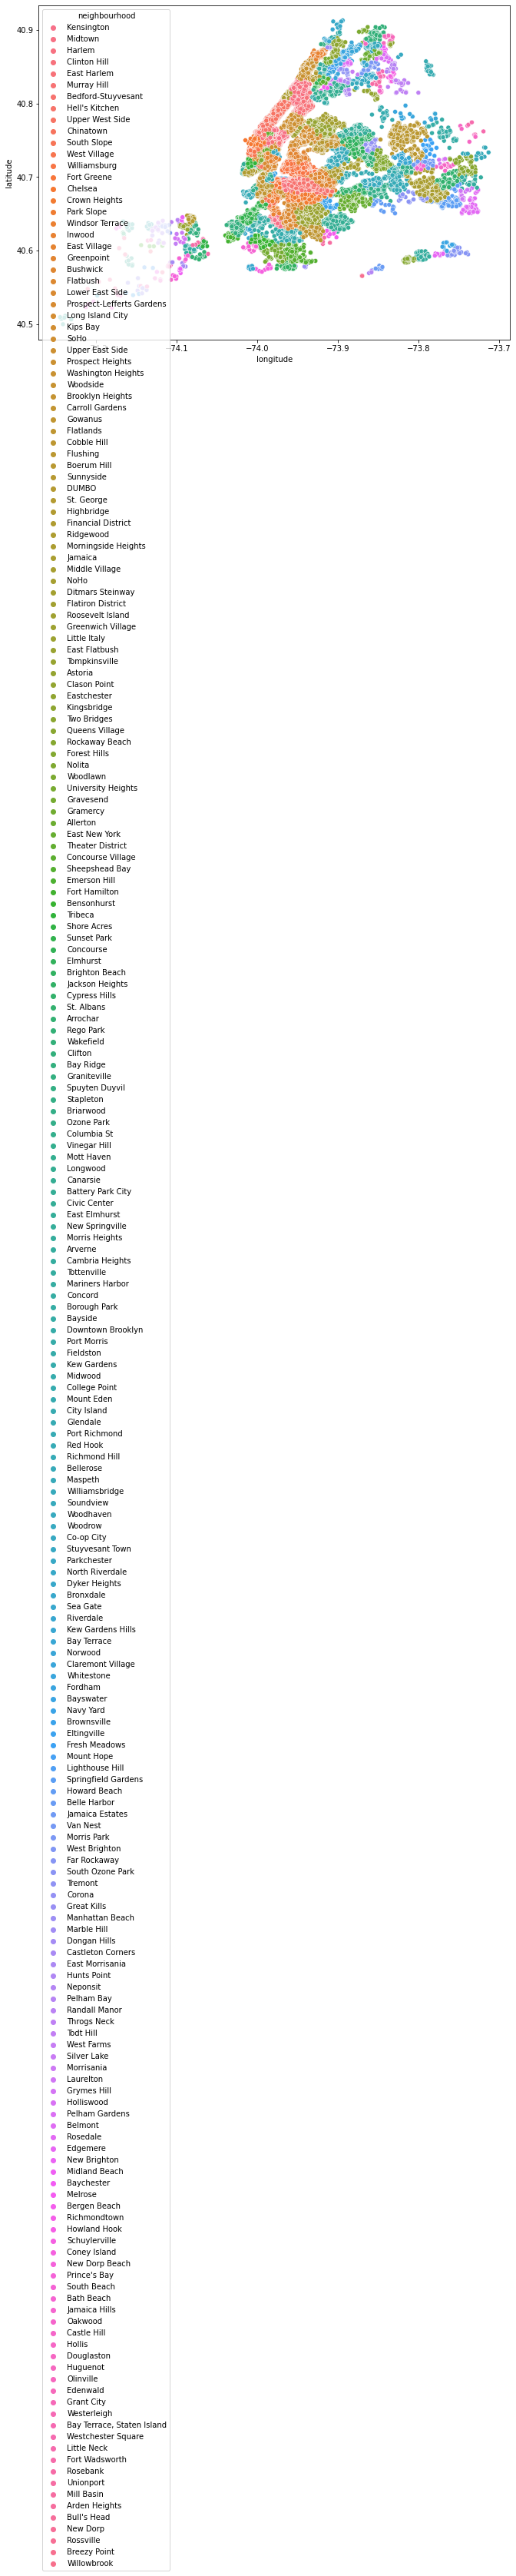

In [ ]:
plt.figure(figsize=(11,8))
sns.scatterplot(air.longitude, air.latitude,hue = air.neighbourhood)
plt.ioff()

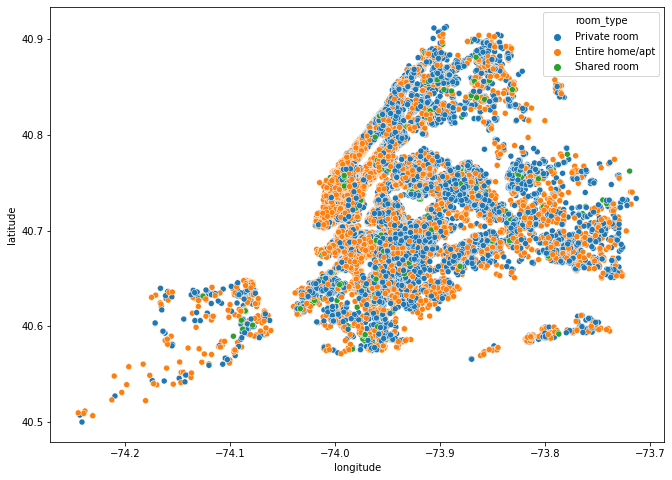

In [ ]:
plt.figure(figsize=(11,8))
sns.scatterplot(air.longitude, air.latitude,hue = air.room_type)
plt.ioff()

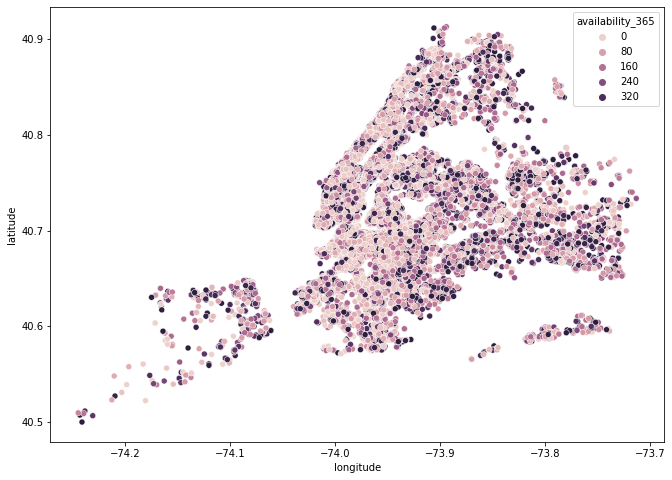

In [ ]:
#availability of the rooms
plt.figure(figsize=(11,8))
sns.scatterplot(air.longitude, air.latitude,hue = air.availability_365)
plt.ioff()

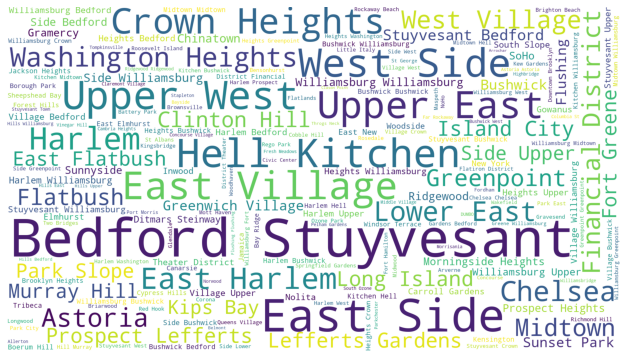

In [ ]:
from wordcloud import WordCloud
plt.subplots(figsize=(11,11))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(air.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()
# Bedford, Stuyvesant has the highest frequency, and lower the size the lesser is the frequency of that neighbouhood city 

In [ ]:
#regression analysis 
#dropping unwated columns
air.drop(['host_id','longitude','latitude','reviews_per_month','number_of_reviews'], axis = 1)
air.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
#encode input variable
def Encode(air):
    for column in air.columns[air.columns.isin(['neighbourhood_group', 'room_type'])]:
        air[column] = air[column].factorize()[0]
    return air



In [ ]:
air_en = Encode(air.copy())
air_en.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,0,Kensington,40.64749,-73.97237,0,149,1,9,0.21,6,365
1,2845,1,Midtown,40.75362,-73.98377,1,225,1,45,0.38,2,355
2,4632,1,Harlem,40.80902,-73.94190,0,150,3,0,0.00,1,365
3,4869,0,Clinton Hill,40.68514,-73.95976,1,89,1,270,4.64,1,194
4,7192,1,East Harlem,40.79851,-73.94399,1,80,10,9,0.10,1,0


Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

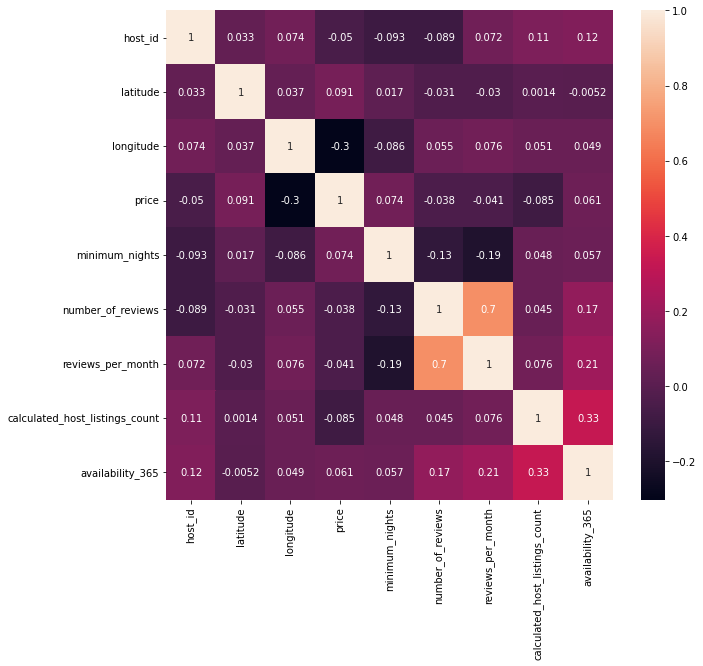

In [ ]:
#correlation (kendal)
cor = air_en.corr(method='kendall')
plt.figure(figsize=(10,9))
sns.heatmap(corr, annot=True)
air_en.columns

In [ ]:
#defining dependent and independent variables
x = air_en.iloc[:,[0,1,3,4,5]]  #i've considered these columns are significant for the model and price as the target variable
y = air_en['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

17736    125
24351    101
10069    189
11679    145
16315    120
Name: price, dtype: int64

In [ ]:
x_train.shape

(44005, 5)

In [ ]:
#linear regression model is used to predict the future price
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
# R2 is 0.08 i.e 8%

0.08932917883245162

In [ ]:
#decession regression 
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)
# used decession tree to find the accuracy of the model

0.009088476285949887